<a href="https://colab.research.google.com/github/rladbstj56/2024_PythonDataAnalysis/blob/main/241128_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# koNLPy 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 2s (82.2 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Don

In [21]:
from konlpy.tag import *
from konlpy.corpus import kolaw
kolaw.fileids()
cons = kolaw.open('constitution.txt').read()
size = 50
print(cons[:size])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [22]:
from konlpy.corpus import kobill
kobill.fileids()
cons = kobill.open('1809890.txt').read()
size = 50
print(cons[:size])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의


In [23]:
# 명사 추출
okt = Okt()
print(okt.nouns(cons[:size]))
hannanum = Hannanum()
print(hannanum.nouns(cons[:size]))
komoran = Komoran()
print(komoran.nouns("\n".join([s for s in cons[:size].split("\n") if s])))
kkma = Kkma()
kkma.nouns(cons[:size])

['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의', '안', '번', '호', '발의']
['지방공무원법', '일부개정법률안', '정의화의원', '대표발', '의', '번', '9890', '발의']
['지방', '공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발', '의', '번', '호', '발']


['지방',
 '지방공무원법',
 '공무원',
 '법',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '정의',
 '정의화의원',
 '화',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '호',
 '9890']

In [24]:
# 형태소 추출 (morph() 이용)
print(okt.morphs(cons[:size]))
print(hannanum.morphs(cons[:size]))
print(komoran.morphs("\n".join([s for s in cons[:size].split("\n") if s])))
print(kkma.morphs(cons[:size]))

['지방공무원법', '일부', '개정', '법률', '안', '\n\n', '(', '정의화', '의원', '대표', '발의', ')', '\n\n ', '의', '안', '\n ', '번', '호', '\n\n', '9890', '\n\n', '발의']
['지방공무원법', '일부개정법률안', '(', '정의화의원', '대표발', '의', ')', '의', '안', '번', '호', '9890', '발의']
['지방', '공무원법', '일부', '개정', '법률', '안', '(', '정의화', '의원', '대표', '발', '의', ')', '의', '안', '번', '호', '9890', '발', '의']
['지방', '공무원', '법', '일부', '개정', '법률안', '(', '정의', '화', '의원', '대표', '발의', ')', '의', '안', '벌', 'ㄴ', '호', '9890', '발의']


In [25]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [26]:
# 빈도수 출력
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from konlpy.corpus import kolaw
print(kolaw.fileids())
cons = kolaw.open('constitution.txt').read()
stopword=['것','곳' ]

okt = Okt()
noun = okt.nouns(cons)
for i, v in enumerate(noun):
  if v in stopword: noun.pop(i)
  if len(v)<2: noun.pop(i)
count = Counter(noun)
print(len(count))
noun_list = count.most_common(200)
for i, v in enumerate(noun_list):
  print(v, end=' ')
  if (i+1) % 5==0 : print()

okt = Okt()
morph = okt.morphs(cons)
for i, v in enumerate(morph):
  if v in stopword: morph.pop(i)
  if len(v)<2: morph.pop(i)
count = Counter(morph)
print(len(count))
morph_list = count.most_common(200)
for i, v in enumerate(morph_list):
  print(v, end=' ')
  if (i+1) % 5==0 : print()

['constitution.txt']
879
('법률', 127) ('대통령', 83) ('국가', 73) ('국회', 68) ('국민', 60) 
('제', 59) ('헌법', 53) ('모든', 37) ('바', 37) ('기타', 26) 
('사항', 23) ('권리', 21) ('의원', 21) ('자유', 20) ('정부', 20) 
('선거', 20) ('임명', 20) ('수', 19) ('직무', 19) ('국무총리', 19) 
('경제', 18) ('의무', 18) ('조직', 18) ('국회의원', 18) ('임기', 18) 
('의결', 17) ('공무원', 17) ('경우', 17) ('이상', 17) ('국무위원', 17) 
('대법원', 17) ('범위', 16) ('법관', 15) ('보호', 14) ('정책', 14) 
('정당', 14) ('헌법재판소', 14) ('재적', 14) ('회의', 14) ('항의', 14) 
('관리', 14) ('노력', 13) ('보장', 13) ('거나', 13) ('요구', 13) 
('법원', 12) ('집회', 12) ('이', 12) ('과반수', 12) ('출석', 12) 
('찬성', 12) ('대한민국', 11) ('조약', 11) ('재판', 11) ('동의', 11) 
('탄핵', 11) ('권한', 11) ('안전보장', 10) ('공포', 10) ('대한', 10) 
('심판', 10) ('다만', 10) ('시행', 10) ('재판관', 10) ('위원', 10) 
('정치', 9) ('효력', 9) ('대하', 9) ('체포', 9) ('절차', 9) 
('형사', 9) ('근로', 9) ('처분', 9) ('위원회', 9) ('행정각부', 9) 
('명령', 9) ('사회', 8) ('질서', 8) ('생활', 8) ('제정', 8) 
('구속', 8) ('구성', 8) ('확정', 8) ('상의', 8) ('제출', 8) 
('국정', 8) ('자문', 8) ('사무'

In [27]:
!apt-get install fonts-nanum* -qq
!apt-get install fontconfig

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
NanumBarunGothic


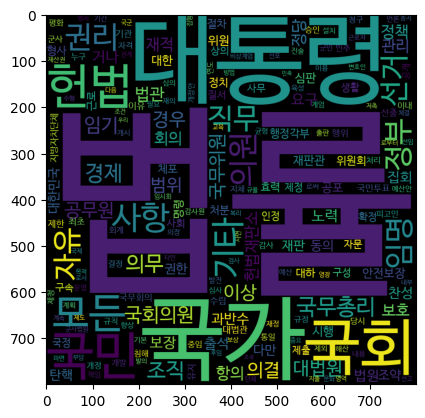

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from konlpy.corpus import kolaw
text = kolaw.open('constitution.txt').read()
okt = Okt()
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc = WordCloud(font_path=fontpath, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [29]:
print(c)

Counter({'법률': 127, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '헌법': 53, '모든': 37, '기타': 26, '사항': 23, '권리': 21, '의원': 21, '자유': 20, '정부': 20, '선거': 20, '임명': 20, '직무': 19, '국무총리': 19, '경제': 18, '의무': 18, '조직': 18, '국회의원': 18, '임기': 18, '의결': 17, '공무원': 17, '경우': 17, '이상': 17, '국무위원': 17, '대법원': 17, '범위': 16, '법관': 15, '보호': 14, '정책': 14, '정당': 14, '헌법재판소': 14, '재적': 14, '회의': 14, '항의': 14, '관리': 14, '노력': 13, '보장': 13, '거나': 13, '요구': 13, '법원': 12, '집회': 12, '과반수': 12, '출석': 12, '찬성': 12, '대한민국': 11, '조약': 11, '다만': 11, '재판': 11, '동의': 11, '탄핵': 11, '권한': 11, '안전보장': 10, '공포': 10, '대한': 10, '심판': 10, '시행': 10, '재판관': 10, '위원': 10, '정치': 9, '효력': 9, '대하': 9, '체포': 9, '절차': 9, '형사': 9, '근로': 9, '처분': 9, '위원회': 9, '행정각부': 9, '명령': 9, '사회': 8, '질서': 8, '생활': 8, '제정': 8, '인정': 8, '구속': 8, '구성': 8, '확정': 8, '상의': 8, '제출': 8, '국정': 8, '자문': 8, '사무': 8, '국민투표': 7, '수립': 7, '유지': 7, '이유': 7, '행위': 7, '제한': 7, '기관': 7, '공개': 7, '선출': 7, '국무회의': 7, '대법관': 7, '지방자치단체': 7, '최초': 7, '민주': 6, '평화': 6,

In [30]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

s1 = np.array([1,1,1,1,0,0,0])
s2 = np.array([1,1,0,1,1,1,0])
s3 = np.array([0,0,0,1,0,1,1])

def cos_similarity(X,Y):
  return dot(X, Y)/(norm(X)*norm(Y))

print(cos_similarity(s1, s2))
print(cos_similarity(s1, s3))
print(cos_similarity(s2, s3))

0.6708203932499369
0.2886751345948129
0.5163977794943222


In [31]:
from konlpy.corpus import kobill
kobill.fileids()
bill = kobill.open('1809893.txt').read()
size = 50
print(bill[:size])

남녀고용평등과 일 ·가정 양립 지원에 관한 법률 

일부개정법률안

(정의화의원 대표발의 


In [32]:
okt.morphs(bill[:size])
hannanum.morphs(bill[:size])
komoran.morphs("\n".join([s for s in bill[:size].split("\n") if s]))
kkma.morphs(bill[:size])

['남녀',
 '고용',
 '평등',
 '과',
 '일',
 '·',
 '가정',
 '양립',
 '지원',
 '에',
 '관하',
 'ㄴ',
 '법률',
 '일부',
 '개정',
 '법률안',
 '(',
 '정의',
 '화',
 '의원',
 '대표',
 '발의']

In [33]:
noun = okt.nouns(bill)
noun = [v for v in noun if v not in stopword and len(v) >= 2]
count = Counter(noun)
print(len(count))
noun_list = count.most_common(200)
for i, v in enumerate(noun_list):
  print(v, end=' ')
  if (i+1) % 5==0 : print()

186
('육아휴직', 41) ('경우', 19) ('발생', 19) ('고용', 18) ('이하', 18) 
('비용', 17) ('가정', 12) ('법률', 11) ('자녀', 10) ('지급', 9) 
('월급', 9) ('체인', 9) ('연령', 8) ('추가', 8) ('급여', 8) 
('개정', 7) ('공무원', 7) ('대체', 7) ('양립', 6) ('지원', 6) 
('근로자', 6) ('자료', 6) ('남녀', 5) ('평등', 5) ('신청', 5) 
('초등학교', 5) ('취학', 5) ('가능', 5) ('예상', 5) ('이상', 5) 
('확률', 5) ('수식', 5) ('일부', 4) ('다음', 4) ('휴직', 4) 
('추계', 4) ('재정', 4) ('지방', 4) ('교육', 4) ('인력', 4) 
('학년', 3) ('대상', 3) ('조정', 3) ('첨부', 3) ('개정안', 3) 
('대상자', 3) ('고용노동부', 3) ('현황', 3) ('정의화', 2) ('의원', 2) 
('발의', 2) ('현행법', 2) ('양육', 2) ('여성', 2) ('상향', 2) 
('로자', 2) ('중인', 2) ('시행', 2) ('사유', 2) ('국가공무원', 2) 
('항제', 2) ('요가', 2) ('평균', 2) ('미만', 2) ('해당', 2) 
('국가', 2) ('현재', 2) ('확대', 2) ('관련', 2) ('법령', 2) 
('때문', 2) ('인건비', 2) ('따라서', 2) ('여부', 2) ('수급', 2) 
('바탕', 2) ('국회예산정책처', 2) ('작성', 2) ('주지', 2) ('행정안전부', 2) 
('통계', 2) ('대표', 1) ('연월일', 1) ('이명수', 1) ('김을동', 1) 
('이사철', 1) ('여상규', 1) ('안규백', 1) ('황영철', 1) ('박영아', 1) 
('김정훈', 1) ('김학송', 1) ('제안', 1) ('이

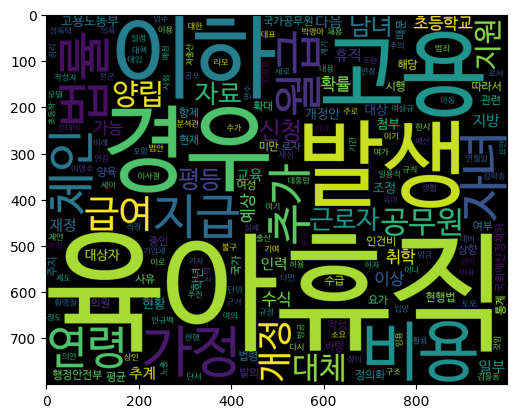

In [34]:
nouns = okt.nouns(bill)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
wc = WordCloud(font_path=fontpath, width=499, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [35]:
filename = '/content/drive/MyDrive/pythondataanalysis/이순신.txt'
f = open(filename,'r',encoding='utf-8')
stopword=['것','곳']
text = f.read()
print(text[:50])

이순신





Exported from Wikisource on 2023년 7월 27일



In [36]:
okt.morphs(text[:size])
hannanum.morphs(text[:size])
komoran.morphs("\n".join([s for s in text[:size].split("\n") if s]))
kkma.morphs(text[:size])

['이순신',
 'Exported',
 'from',
 'Wikisource',
 'on',
 '2023',
 '년',
 '7',
 '월',
 '27',
 '일']

In [37]:
noun = okt.nouns(text)
# for i, v in enumerate(noun):
#   if v in stopword: noun.pop(i)
#   if len(v)<2: noun.pop(i)
noun = [v for v in noun if v not in stopword and len(v) >= 2]
count = Counter(noun)
print(len(count))
noun_list = count.most_common(200)
for i, v in enumerate(noun_list):
  print(v, end=' ')
  if (i+1) % 5==0 : print()

5897
('순신', 960) ('군사', 632) ('사람', 434) ('적병', 322) ('보고', 298) 
('조선', 228) ('원균', 213) ('싸움', 204) ('백성', 201) ('적선', 191) 
('일본', 187) ('나라', 184) ('하나', 176) ('수군', 172) ('함대', 158) 
('성룡', 155) ('적의', 155) ('생각', 148) ('자기', 144) ('소리', 143) 
('평양', 143) ('서울', 138) ('부산', 136) ('우리', 136) ('도망', 134) 
('가지', 129) ('장수', 127) ('적군', 127) ('모양', 123) ('바다', 119) 
('일본군', 115) ('다시', 109) ('수가', 107) ('그것', 103) ('모두', 93) 
('경상', 92) ('전라', 90) ('전라도', 89) ('듯이', 86) ('머리', 86) 
('명나라', 86) ('소서행장', 85) ('어찌', 85) ('조정', 84) ('이순신', 80) 
('수사', 80) ('동안', 80) ('한산도', 80) ('군관', 79) ('장졸', 78) 
('때문', 77) ('한번', 74) ('여러', 72) ('부하', 72) ('소인', 72) 
('오직', 70) ('이편', 70) ('마치', 69) ('만일', 69) ('김명원', 69) 
('거북선', 67) ('벌써', 67) ('이십', 67) ('먼저', 67) ('부사', 66) 
('무슨', 66) ('대장', 66) ('주사', 66) ('다른', 66) ('도원수', 66) 
('병선', 64) ('어디', 64) ('데리', 63) ('통제', 63) ('이튿날', 62) 
('주장', 61) ('마침내', 61) ('만호', 59) ('까닭', 59) ('마음', 58) 
('타고', 58) ('여송', 58) ('대선', 57) ('길이', 55) ('사또', 53

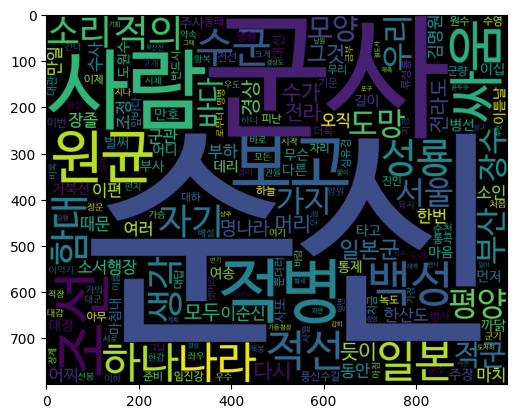

In [38]:
#nouns = okt.nouns(text)
words = [n for n in noun if len(n) > 1]
c = Counter(words)
wc = WordCloud(font_path=fontpath, width=499, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)